In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from pylab import *
from io import StringIO


# Esperienza 1: Termometria
**Data**: 22 Ottobre 2018  
**Gruppo**: (V) Ivan , Antonio Gonzalez, Pietro


## Materiale

|Strumenti| Divisione| Portata |
|---------:|:-----------------|:-------------|
|2 Termometri a mercurio    |$0.2^\circ C$    | $100^\circ C$ |
|Bilancia | $0.1 g$ | -- |
|Calorimetri| -- | $1 l$ |
|Cronometro | $0.01 s$ | |

## 1. Costante di tempo del termometro

### Relazioni di base per il processo ideale
La relazione che lega la risposta del termometro al tempo è data dalla seguente formula:
$$T(t)=T_{amb}+(T_{f}-T_{amb} )e ^{-\frac{t}{\tau}}$$
dove:
- $T(t)$ rappresenta la temperatura mostrata sul termometro all'istante di tempo $t$;
- $T_{amb}$ rappresenta la temperatura riportata sul termometro prima che questo venga inserito nel bagno di acqua cala, ovvero la temperatura al tempo $t=0$;
- $T_{f}$ rappresenta la temperatura dell'acqua calda;
- $\tau$ rappresenta la costante di tempo del termometro che vogliamo stimare; 

### Procedimento di misura
1. Nel primo calorimetro versiamo una quantità di acqua alla temperatura di $\sim 54^\circ C$, che rappresenta la nostra $T_{f}$; nel secondo una quantità di acqua a temperatura ambiente;
2. Immergiamo il termometro nel bagno di acqua a temperatura ambiente e aspettiamo che termalizzi con l'acqua stessa; a termalizzazione avvenuta registriamo la temperatura segnata dal termometro come $T_{amb}$
3. Immergiamo il termometro nel calorimetro con l'acqua calda e registriamo la temperatura segnta ad intervalli di tempo fissati ($0.5s$); 

Effettuiamo l'analisi dei dati servendoci di Python.
### Dati
 
`t`: tempo (s)  
`T`: temperatura ( $^\circ C$ )  
`DT`: risoluzione del termometro (distanza tra due tacche)  
`sT`: incertezza (deviazione standard) su T

Eseguiamo un fit sui dati raccolti attraversp la funzione curve_fit della libreria scipy. curve_fit riceve in ingresso una funzione che restituisce un esponenziale, un vettore contente gli istanti di tempo ad intervalli di $0.5s$ (asse $x$), un vettore contenente le temperature registrate (asse $y$), e un vettore con lo stesso numero di elementi dei vettori precedenti e contente l'incertezza associata a ogni misura di temperatura. Assumendo una distribuizione uniforme nell'intervallo delle divisioni stimiaimo tale incertezza come $ \frac{DT}{\sqrt{12}} $. L'ultimo parametro di curve_fit viene dichiarato TRUE in modo da calcolare le incertezze assolute. 

#### Video 1, 1s

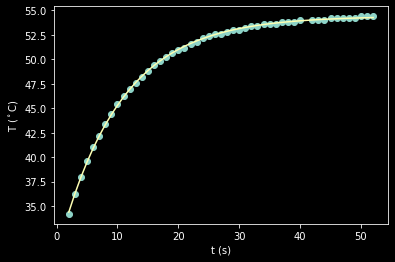

In [7]:
s = open("Datos12.txt").read().replace(",", ".")
t,T = transpose(loadtxt(StringIO(s)))
DT= 0.2
T0=28.2
DeltaT=54.4-T0;
dS=DT/sqrt(12)*np.ones_like(T)
def fit_func(t, tau):
    return   T0- DeltaT*exp(-t/tau)
params,pcov = curve_fit(fit_func, t, T,sigma=dS, absolute_sigma=True)
tau = params
plot(t, T, "o")
plot(t, fit_func(t, tau))
xlabel("t (s)")
ylabel("T ($^\circ$C)")
plt.show()


In [8]:
print("tau = %.2f +/- %.2f s" % (tau, sqrt(pcov[0,0])))

tau = 10.15 +/- 0.04 s


#### Video 1, 0.5 s

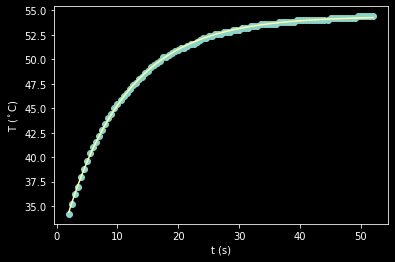

In [37]:
s = open("Datos1.txt").read().replace(",", ".")
t,T = transpose(loadtxt(StringIO(s)))
DT= 0.2
dS=DT/sqrt(12)*np.ones_like(T)
def fit_func(t, tau,TF ,DeltaT):
    return TF - DeltaT*exp(-t/tau)
params,pcov = curve_fit(fit_func, t, T,sigma=dS, absolute_sigma=True)
tau, T0, DeltaT = params
plot(t, T, "o")
plot(t, fit_func(t, tau, T0, DeltaT))
xlabel("t (s)")
ylabel("T ($^\circ$C)")
plt.show()

In [38]:
print("tau = %.2f +/- %.2f s" % (tau, sqrt(pcov[0,0])))

tau = 10.12 +/- 0.03 s


#### Video 2 , 0.5 s (30 secondi) No lo hace bien :(

## Calcolo di $\tau$ attraverso la legge di raffreddamento di Newton
E' possibile calcolare analiticamente il valore di $\tau$ attraverso la legge di raffreddamento di Newton $$ \tau=\frac{C}{hA}$$ dove 
- C é la capacitá termica del mercurio, che possiamo calolare come attraverso il calore specifico e la massa, il primo noto, la seconda ricavata dalla relazione $v\rho = m$. Sapendo che $\rho = 1.3\cdot 10^4 Kg/m^3$ e, assumendo una forma cilindrica per il bulbo, dati l'altezza $ l = 11 mm $ e il diametro $d= 6 mm$ del bulbo, si ottiene che $$ C=cv\rho$$
- h é il coefficiente di convezione in acqua statica e vale $ 750 W/m^2K $;
- A é la superficie del bulbo



In [14]:
c = 4.186e3*0.586
h = 750
r = 0.003
l = 0.011
rho = 0.789e3

tau = c*r**2*np.pi*l*rho/(h*2*r*np.pi*l)
print("tau = %.1f s " % (tau))

tau = 3.9 s 


Confrontando i valori ottenuti dalle misure con il valore di $\tau$ calcolato analiticamente notiamo che questi valori sono decisamente poco consistenti. Alla luce di questa inconsistenza ipotiziamo che il termometro con il quale abbiamo effettuato le misure non sia un termometro a mercurio. 

## 2 Calcolo calore specifico